<a href="https://colab.research.google.com/github/enunezs/IntroAI_Assignment/blob/main/Worksheet_Week_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Layer Neural Network

In this question we apply a single-layer neural network to a linearly separable toy data set.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import Perceptron

We start by generating  and visualizing some data

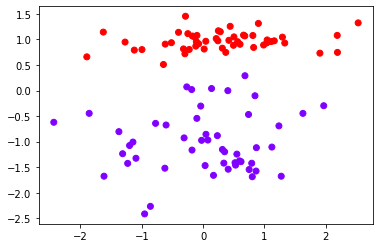

In [ ]:
X, y = make_classification(n_features=2, n_redundant=0, \
            n_informative=1, random_state=1,n_clusters_per_class=1)
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y, cmap='rainbow')
plt.show()

Notice that the two classes can clearly be separated by a single line. We can now fit a single layer neural network to the data.

In [ ]:
nn=Perceptron(alpha=1, max_iter=1000) 
model=nn.fit(X,y)


We can visualise the performance of this network again using a scatter plot, and colour the using predicted class. Is the network able to give the right classification for each point?

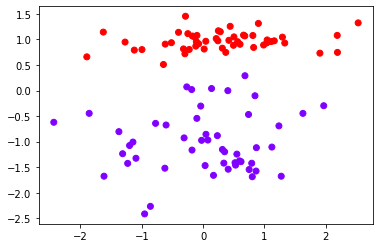

In [ ]:
ypred=model.predict(X)
# TODO: Make a scatter plot 

plt.scatter(X[:,0],X[:,1],c=ypred, cmap='rainbow')
#Yup

# Multi-Layer NN on Toy Problems
In this question we consider two toy problems in which the classes are not linearly separable. In the first example the two classes form moon shapes.

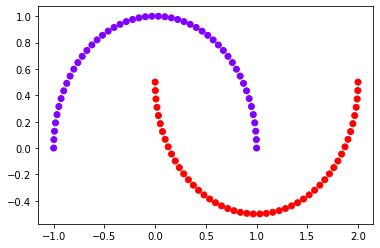

In [ ]:
X1, y1 = make_moons()
plt.figure()
plt.scatter(X1[:,0],X1[:,1],c=y1, cmap='rainbow')
plt.show()

Try fitting a single-layer neural network to the data. 
Comment on the performance and hypothesise what might be the source of the errors.

In [ ]:
#TODO
nn=Perceptron(alpha=1, max_iter=1000) 
model=nn.fit(X1,y1)


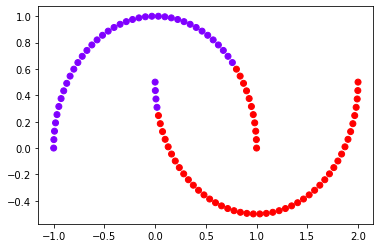

In [ ]:
ypred1=model.predict(X1)
# TODO: Make a scatter plot 

plt.scatter(X1[:,0],X1[:,1],c=ypred1, cmap='rainbow')
#Yup


We can now try to fit an multi-layer NN to the same data.

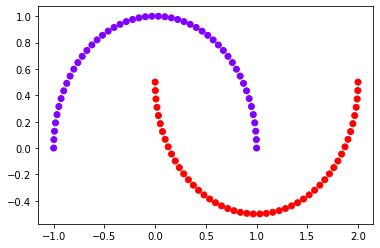

In [ ]:
nn1=MLPClassifier(alpha=1,hidden_layer_sizes=(10,10,10,10), max_iter=1000, activation='tanh') #4 layers of 10 neurons
model2=nn1.fit(X1,y1)
ypred2=model2.predict(X1)
plt.figure()
plt.scatter(X1[:,0],X1[:,1],c=ypred2, cmap='rainbow')
plt.show()

This NN has 4 hidden layers each with 10 neurons. The parameter
`hidden_layer_sizes=(x,y,z, ...)` identifies the number of neurons in each layer. Try experimenting with different configurations of hidden layers to see the effect on performance.

Investigate the parameter `activation`. What are the different activation functions?

The activation functions are:
    
        

  
*   ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
*   ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
*   ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
*    ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)





We now introduce another toy classification problem based on classes in the form of two circles. Experiment with using different NN architectures to fit this data and plot the results.

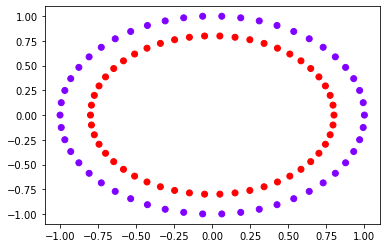

In [ ]:
X2, y2 = make_circles()
plt.figure()
plt.scatter(X2[:,0],X2[:,1],c=y2, cmap='rainbow')
plt.show()

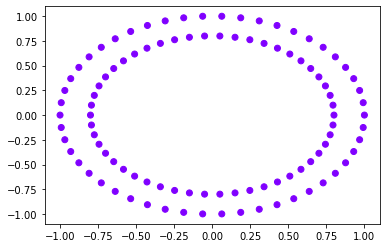

In [ ]:
nn2=MLPClassifier(alpha=1,hidden_layer_sizes=(10,10,10,10), max_iter=1000, activation='relu') #4 layers of 10 neurons
model2=nn2.fit(X2,y2)
ypred2=model2.predict(X2)

plt.figure()
plt.scatter(X2[:,0],X2[:,1],c=ypred2, cmap='rainbow')
plt.show()

# Handwritten Digit Recognition
The data set contains images of hand-written digits. There are 10 classes where each class refers to a digit. Preprocessing programs were used to extract normalized bitmaps of handwritten digits from a preprinted form.  32 × 32 bitmaps are divided into non-overlapping blocks of 4 × 4 and the number of on pixels are counted in each block. This generates an input matrix of 8 × 8 where each element is an integer in the range 0...16.

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.datasets import load_digits
digits = load_digits()


Divide the data into training and test sets, fit a NN to the training data and evaulate its accuracy on both training and test data.

In [ ]:
#TODO
##Divide
x = digits.data
y = digits.target

x_training, x_test, y_training, y_test = train_test_split(x, y, test_size = 0.2, random_state = 314 )


In [ ]:
##Fit NN
nn3 = MLPClassifier(alpha=1,hidden_layer_sizes=(10,10,10,10), max_iter=200, activation='tanh') #4 layers of 10 neurons
model3=nn3.fit(x_training,y_training)
ypred3=model3.predict(x_training)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
##Accurracy
### training
from sklearn.metrics import accuracy_score

accuracy_test = accuracy_score(y_training, ypred3)
print(accuracy_test)

ypred_test=model3.predict(x_test)


accuracy_test = accuracy_score(y_test, ypred_test)
print(accuracy_test)

0.977731384829506
0.9111111111111111


It is also useful to plot a time series graph of the loss function (error) against iteration.

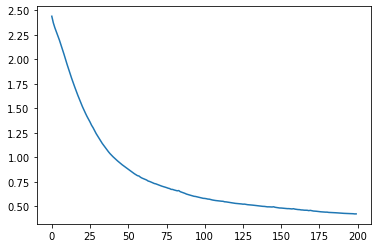

In [ ]:
loss_values = model3.loss_curve_
plt.figure() 
plt.plot(loss_values)
plt.show()

Try experimenting with different architectures and activation functions. 